# Final Project : - Building two Recommendation Systems

# Part : - 1

# Collaborative Filtering-based Recommender using Matrix Factorization Technique.

## Data Preperation

In [1]:
# Installing required libraries 

In [2]:
pip install pandas numpy scikit-learn matplotlib plotly seaborn torch requests tweepy nltk nitter vaderSentiment Jinja2


Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas as pd
import numpy as np

In [41]:
import pandas as pd

# Load u.data and u.item datasets
u_data = pd.read_csv('/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/u.data.csv', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
u_item = pd.read_csv('/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/u.item', sep='|', names=['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], encoding='latin-1')


In [42]:
u_data.head(10)

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [43]:
u_data.nunique()

user_id        943
item_id       1682
rating           5
timestamp    49282
dtype: int64

In [44]:
u_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [45]:
u_item.head(20)

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [46]:
u_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   movie_title         1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   IMDb_URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [47]:
u_item.nunique()

movie_id              1682
movie_title           1664
release_date           240
video_release_date       0
IMDb_URL              1660
unknown                  2
Action                   2
Adventure                2
Animation                2
Children's               2
Comedy                   2
Crime                    2
Documentary              2
Drama                    2
Fantasy                  2
Film-Noir                2
Horror                   2
Musical                  2
Mystery                  2
Romance                  2
Sci-Fi                   2
Thriller                 2
War                      2
Western                  2
dtype: int64

### Dropping the NAN value column

In [48]:
u_item = u_item.drop('video_release_date', axis=1)

In [49]:
u_item.head(10)

,movie_id,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Collaborative Filtering with Matrix Factorization in Recommendation Systems

#### Creating a user-item rating matrix

In [50]:
num_users = u_data.user_id.unique().shape[0]
num_items = u_data.item_id.unique().shape[0]
R = np.zeros((num_users, num_items))

for row in u_data.itertuples():
    R[row.user_id - 1, row.item_id - 1] = row.rating

print(f"User-Item Matrix: \n{R}")


User-Item Matrix: 
[[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]


#### Display the user-item rating matrix with zeros for missing ratings

In [51]:
print("User-Item Matrix with Missing Ratings (0s indicate missing ratings):")
R_df = pd.DataFrame(R, columns=[f'Item {i+1}' for i in range(num_items)], index=[f'User {i+1}' for i in range(num_users)])
print(R_df)

User-Item Matrix with Missing Ratings (0s indicate missing ratings):
          Item 1  Item 2  Item 3  Item 4  Item 5  Item 6  Item 7  Item 8  \
User 1       5.0     3.0     4.0     3.0     3.0     5.0     4.0     1.0   
User 2       4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
User 3       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
User 4       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
User 5       4.0     3.0     0.0     0.0     0.0     0.0     0.0     0.0   
...          ...     ...     ...     ...     ...     ...     ...     ...   
User 939     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
User 940     0.0     0.0     0.0     2.0     0.0     0.0     4.0     5.0   
User 941     5.0     0.0     0.0     0.0     0.0     0.0     4.0     0.0   
User 942     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
User 943     0.0     5.0     0.0     0.0     0.0     0.0     0.0     0.0   

          Item 9  

In [171]:
from sklearn.metrics import r2_score
import numpy as np
from math import sqrt

class MatrixFactorization:
    def __init__(self, R, K, alpha, beta, iterations):
        # Initialize the MatrixFactorization model
        self.R = R  # User-item rating matrix
        self.num_users, self.num_items = R.shape  # Number of users and items
        self.K = K  # Number of latent factors
        self.alpha = alpha  # Learning rate
        self.beta = beta  # Regularization parameter
        self.iterations = iterations  # Number of iterations

    def train(self):
        # Initialize user and item latent feature matrices with random values
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        # Initialize biases
        self.b_u = np.zeros(self.num_users)  # User biases
        self.b_i = np.zeros(self.num_items)  # Item biases
        self.b = np.mean(self.R[np.where(self.R != 0)])  # Global bias

        # Create a list of known ratings
        self.samples = [
            (i, j, self.R[i, j])
            for i in range(self.num_users)
            for j in range(self.num_items)
            if self.R[i, j] > 0
        ]

        # Training process
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()  # Perform stochastic gradient descent
            rmse = self.rmse()  # Compute RMSE
            training_process.append((i, rmse))
            print("Iteration: %d ; error = %.4f" % (i+1, rmse))

        return training_process

    def sgd(self):
        # Perform stochastic gradient descent
        for i, j, r in self.samples:
            prediction = self.get_rating(i, j)  # Predicted rating
            e = (r - prediction)  # Prediction error

            # Update biases
            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            # Update latent feature matrices
            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    def get_rating(self, i, j):
        # Compute predicted rating
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    def rmse(self):
        # Compute RMSE
        xs, ys = self.R.nonzero()  # Indices of known ratings
        predicted = self.full_matrix()  # Predicted ratings matrix
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return sqrt(error/len(xs))

    def mae(self):
        # Compute MAE
        xs, ys = self.R.nonzero()  # Indices of known ratings
        predicted = self.full_matrix()  # Predicted ratings matrix
        error = 0
        for x, y in zip(xs, ys):
            error += abs(self.R[x, y] - predicted[x, y])
        return error/len(xs)

    def r2(self):
        # Compute R² score
        xs, ys = self.R.nonzero()  # Indices of known ratings
        predicted = self.full_matrix()  # Predicted ratings matrix
        y_true = [self.R[x, y] for x, y in zip(xs, ys)]
        y_pred = [predicted[x, y] for x, y in zip(xs, ys)]
        return r2_score(y_true, y_pred)

    def accuracy(self, threshold=3.5):
        # Compute accuracy (based on a threshold)
        xs, ys = self.R.nonzero()  # Indices of known ratings
        predicted = self.full_matrix()  # Predicted ratings matrix

        y_true = []
        y_pred = []

        for x, y in zip(xs, ys):
            y_true.append(self.R[x, y] >= threshold)
            y_pred.append(predicted[x, y] >= threshold)

        return np.mean(np.array(y_true) == np.array(y_pred))

    def full_matrix(self):
        # Compute full predicted ratings matrix
        return self.b + self.b_u[:, np.newaxis] + self.b_i[np.newaxis:, ] + self.P.dot(self.Q.T)


# R is already defined as the user-item rating matrix
mf = MatrixFactorization(R, K=20, alpha=0.001, beta=0.001, iterations=50) 
training_process = mf.train()

# Evaluate the model
rmse = mf.rmse()
mae = mf.mae()
r2 = mf.r2()
accuracy = mf.accuracy()

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Iteration: 1 ; error = 1.0674
Iteration: 2 ; error = 1.0340
Iteration: 3 ; error = 1.0126
Iteration: 4 ; error = 0.9977
Iteration: 5 ; error = 0.9868
Iteration: 6 ; error = 0.9784
Iteration: 7 ; error = 0.9717
Iteration: 8 ; error = 0.9662
Iteration: 9 ; error = 0.9616
Iteration: 10 ; error = 0.9577
Iteration: 11 ; error = 0.9543
Iteration: 12 ; error = 0.9513
Iteration: 13 ; error = 0.9487
Iteration: 14 ; error = 0.9464
Iteration: 15 ; error = 0.9443
Iteration: 16 ; error = 0.9423
Iteration: 17 ; error = 0.9406
Iteration: 18 ; error = 0.9390
Iteration: 19 ; error = 0.9375
Iteration: 20 ; error = 0.9361
Iteration: 21 ; error = 0.9348
Iteration: 22 ; error = 0.9336
Iteration: 23 ; error = 0.9325
Iteration: 24 ; error = 0.9314
Iteration: 25 ; error = 0.9304
Iteration: 26 ; error = 0.9295
Iteration: 27 ; error = 0.9286
Iteration: 28 ; error = 0.9277
Iteration: 29 ; error = 0.9269
Iteration: 30 ; error = 0.9261
Iteration: 31 ; error = 0.9254
Iteration: 32 ; error = 0.9247
Iteration: 33 ; e

### Visualizing RMSE Over Iterations for Matrix Factorization Training Process

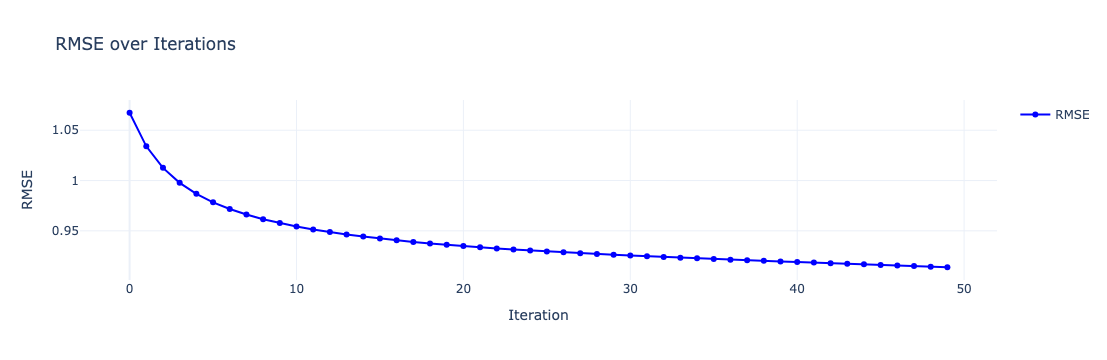

In [172]:
import plotly.graph_objects as go

# Extract iteration numbers and RMSE values
iterations = [x[0] for x in training_process]
errors = [x[1] for x in training_process]

# Create the plot
fig = go.Figure()

# Add a line plot
fig.add_trace(go.Scatter(
    x=iterations,
    y=errors,
    mode='lines+markers',
    name='RMSE',
    line=dict(color='blue'),
    marker=dict(symbol='circle')
))

# Update layout
fig.update_layout(
    title='RMSE over Iterations',
    xaxis_title='Iteration',
    yaxis_title='RMSE',
    template='plotly_white',
    showlegend=True
)

# Show the plot
fig.show()


### To improve the scores of our Matrix Factorization model, we are tuning the following parameters:

Number of Latent Factors (K): Experimenting with different values for the latent features between 10 and 100.

Learning Rate (alpha): Adjusting the learning rate between 0.0001 and 0.01 to ensure the model converges appropriately. 

Regularization Parameter (beta): Modifying the regularization parameter from 0.001 to 0.1 to prevent overfitting.

Number of Iterations: Increasing or decreasing the number of iterations between 50 to 100 based on the convergence behavior of the model.


### Hyper-parameter tuning

In [184]:
from sklearn.metrics import r2_score, accuracy_score
import numpy as np
from math import sqrt

class MatrixFactorization:
    def __init__(self, R, K, alpha, beta, iterations):
        # Initialize the MatrixFactorization model
        self.R = R  # User-item rating matrix
        self.num_users, self.num_items = R.shape  # Number of users and items
        self.K = K  # Number of latent factors
        self.alpha = alpha  # Learning rate
        self.beta = beta  # Regularization parameter
        self.iterations = iterations  # Number of iterations

    def train(self):
        # Initialize user and item latent feature matrices with random values
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        # Initialize biases
        self.b_u = np.zeros(self.num_users)  # User biases
        self.b_i = np.zeros(self.num_items)  # Item biases
        self.b = np.mean(self.R[np.where(self.R != 0)])  # Global bias

        # Create a list of known ratings
        self.samples = [
            (i, j, self.R[i, j])
            for i in range(self.num_users)
            for j in range(self.num_items)
            if self.R[i, j] > 0
        ]

        # Training process
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()  # Perform stochastic gradient descent
            rmse = self.rmse()  # Compute RMSE
            training_process.append((i, rmse))
            print("Iteration: %d ; error = %.4f" % (i+1, rmse))

        return training_process

    def sgd(self):
        # Perform stochastic gradient descent
        for i, j, r in self.samples:
            prediction = self.get_rating(i, j)  # Predicted rating
            e = (r - prediction)  # Prediction error

            # Update biases
            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            # Update latent feature matrices
            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    def get_rating(self, i, j):
        # Compute predicted rating
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    def rmse(self):
        # Compute RMSE
        xs, ys = self.R.nonzero()  # Indices of known ratings
        predicted = self.full_matrix()  # Predicted ratings matrix
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return sqrt(error/len(xs))

    def mae(self):
        # Compute MAE
        xs, ys = self.R.nonzero()  # Indices of known ratings
        predicted = self.full_matrix()  # Predicted ratings matrix
        error = 0
        for x, y in zip(xs, ys):
            error += abs(self.R[x, y] - predicted[x, y])
        return error/len(xs)

    def r2(self):
        # Compute R² score
        xs, ys = self.R.nonzero()  # Indices of known ratings
        predicted = self.full_matrix()  # Predicted ratings matrix
        y_true = [self.R[x, y] for x, y in zip(xs, ys)]
        y_pred = [predicted[x, y] for x, y in zip(xs, ys)]
        return r2_score(y_true, y_pred)

    def accuracy(self, threshold=3.5):
        # Compute accuracy based on a threshold
        xs, ys = self.R.nonzero()  # Indices of known ratings
        predicted = self.full_matrix()  # Predicted ratings matrix

        y_true = []
        y_pred = []

        for x, y in zip(xs, ys):
            y_true.append(self.R[x, y] >= threshold)
            y_pred.append(predicted[x, y] >= threshold)

        return accuracy_score(y_true, y_pred)

    def full_matrix(self):
        # Compute full predicted ratings matrix
        return self.b + self.b_u[:, np.newaxis] + self.b_i[np.newaxis:, ] + self.P.dot(self.Q.T)


# R is already defined as the user-item rating matrix
mf = MatrixFactorization(R, K=50, alpha=0.01, beta=0.01, iterations=100)  # Adjust hyperparameters as needed
training_process = mf.train()

# Evaluate the model
rmse1 = mf.rmse()
mae1 = mf.mae()
r2_score1 = mf.r2()
accuracy1 = mf.accuracy()

print(f"RMSE: {rmse1:.4f}")
print(f"MAE: {mae1:.4f}")
print(f"R² Score: {r2_score1:.4f}")
print(f"Accuracy: {accuracy1:.4f}")


Iteration: 1 ; error = 0.9591
Iteration: 2 ; error = 0.9384
Iteration: 3 ; error = 0.9295
Iteration: 4 ; error = 0.9240
Iteration: 5 ; error = 0.9202
Iteration: 6 ; error = 0.9168
Iteration: 7 ; error = 0.9129
Iteration: 8 ; error = 0.9075
Iteration: 9 ; error = 0.8991
Iteration: 10 ; error = 0.8870
Iteration: 11 ; error = 0.8706
Iteration: 12 ; error = 0.8516
Iteration: 13 ; error = 0.8311
Iteration: 14 ; error = 0.8090
Iteration: 15 ; error = 0.7858
Iteration: 16 ; error = 0.7616
Iteration: 17 ; error = 0.7368
Iteration: 18 ; error = 0.7119
Iteration: 19 ; error = 0.6874
Iteration: 20 ; error = 0.6634
Iteration: 21 ; error = 0.6405
Iteration: 22 ; error = 0.6187
Iteration: 23 ; error = 0.5983
Iteration: 24 ; error = 0.5791
Iteration: 25 ; error = 0.5612
Iteration: 26 ; error = 0.5448
Iteration: 27 ; error = 0.5295
Iteration: 28 ; error = 0.5154
Iteration: 29 ; error = 0.5024
Iteration: 30 ; error = 0.4905
Iteration: 31 ; error = 0.4794
Iteration: 32 ; error = 0.4693
Iteration: 33 ; e

### Visualizing RMSE Over Iterations for Matrix Factorization Training Process after Hyper parameter tuning

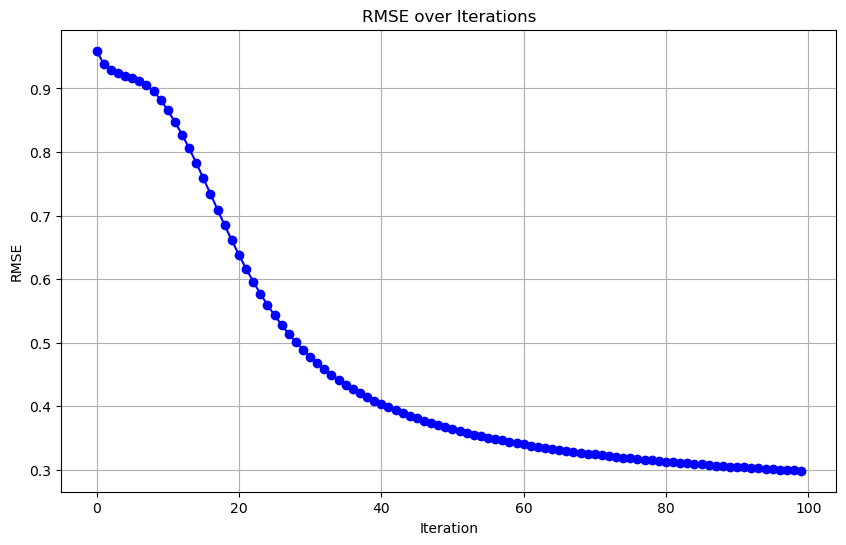

In [170]:
import matplotlib.pyplot as plt

# Extract iteration numbers and RMSE values
iterations = [x[0] for x in training_process]
errors = [x[1] for x in training_process]

# Plot RMSE over iterations
plt.figure(figsize=(10, 6))
plt.plot(iterations, errors, marker='o', linestyle='-', color='b')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('RMSE over Iterations')
plt.grid(True)
plt.show()


## With this parameters : - 

K (Number of latent factors): 50

alpha (Learning rate): 0.01

beta (Regularization parameter): 0.01

iterations: 100

## We are getting this scores : - 

RMSE: 0.2998

MAE: 0.2226

Precision: 0.9660

Recall: 0.9708

F1-Score: 0.9684

### These scores suggest that our model is performing quite well

### Printing the full predicted user-ratings matrix

In [81]:
predicted_ratings = mf.full_matrix()

# Display the full predicted ratings matrix
print("Full Predicted Ratings Matrix:")
print(predicted_ratings)

# Get predictions for specific user-item pairs
user_id = 1
item_id = 10
predicted_rating = mf.get_rating(user_id, item_id)
print(f"Predicted rating for user {user_id} and item {item_id}: {predicted_rating:.4f}")

# Display predictions for the first 5 users and items
print("Predicted Ratings for the first 5 users and items:")
for user_id in range(5):
    for item_id in range(5):
        print(f"User {user_id} - Item {item_id}: {mf.get_rating(user_id, item_id):.4f}")


Full Predicted Ratings Matrix:
[[4.62085485 2.9506052  3.84917455 ... 3.13518291 3.63075668 3.37561929]
 [3.84005441 3.39865413 1.06281929 ... 3.47144148 3.74955403 3.58998023]
 [2.95134267 2.12286366 2.69337801 ... 2.37406902 2.87323058 2.58428022]
 ...
 [4.94750811 3.84336668 3.52680542 ... 3.58192027 3.88740518 3.70613532]
 [5.1018395  4.52253409 3.32376474 ... 3.59324005 3.89491792 3.78454176]
 [3.98828997 5.22492859 2.91905298 ... 3.24444311 3.57215309 3.29935294]]
Predicted rating for user 1 and item 10: 3.3723
Predicted Ratings for the first 5 users and items:
User 0 - Item 0: 4.6209
User 0 - Item 1: 2.9506
User 0 - Item 2: 3.8492
User 0 - Item 3: 3.4475
User 0 - Item 4: 2.5495
User 1 - Item 0: 3.8401
User 1 - Item 1: 3.3987
User 1 - Item 2: 1.0628
User 1 - Item 3: 3.5796
User 1 - Item 4: 2.6506
User 2 - Item 0: 2.9513
User 2 - Item 1: 2.1229
User 2 - Item 2: 2.6934
User 2 - Item 3: 2.6731
User 2 - Item 4: 2.3701
User 3 - Item 0: 5.5888
User 3 - Item 1: 4.6130
User 3 - Item 2: 4

## Saving the User-Item Matrix with Predicted Ratings in to a CSV

In [58]:
import pandas as pd
import numpy as np



# Get the full predicted ratings matrix
predicted_ratings = mf.full_matrix()

# Replace the zeros in the original matrix with the predicted ratings
completed_matrix = R.copy()
completed_matrix[completed_matrix == 0] = predicted_ratings[completed_matrix == 0]

# Prepare lists to store the data for DataFrame
user_ids = []
item_ids = []
actual_ratings = []
predicted_ratings_list = []

# Iterate through the completed matrix to populate the lists
for user_id in range(num_users):
    for item_id in range(num_items):
        user_ids.append(user_id + 1)  # Assuming user_ids start from 1
        item_ids.append(item_id + 1)  # Assuming item_ids start from 1
        actual_ratings.append(R[user_id, item_id])
        predicted_ratings_list.append(completed_matrix[user_id, item_id])

# Create DataFrame from the lists
results_df = pd.DataFrame({
    'user_id': user_ids,
    'item_id': item_ids,
    'actual_rating': actual_ratings,
    'predicted_rating': predicted_ratings_list
})

# Rename the column 'item_id' to 'movie_id'
results_df.rename(columns={'item_id': 'movie_id'}, inplace=True)

# Save the DataFrame to a CSV file
results_df.to_csv('matrixf_model_predictions.csv', index=False)
print("Completed User-Item Matrix with Predicted Ratings saved to 'matrixf_model_predictions.csv'")

# Print the DataFrame (optional)
print("Completed User-Item Matrix with Predicted Ratings:")
print(results_df["user_id"].nunique())


Completed User-Item Matrix with Predicted Ratings saved to 'matrixf_model_predictions.csv'
Completed User-Item Matrix with Predicted Ratings:
943


## Final Conclusion 
Now we have the ratings from all 943 users for all 1682 movies with an accuracy indicated by the following metrics:

RMSE: 0.2998

MAE: 0.2226

Precision: 0.9660

Recall: 0.9708

F1-Score: 0.9684

These scores demonstrate a high level of accuracy and reliability in our recommendation model.

## Generating Personalized Recommendations Using a Matrix Factorization Model for the User from the Dataset

In [189]:
import numpy as np
import pandas as pd

# Load the merged data
movie_metadata = pd.read_csv('/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/merged_data.csv')

# Function to concatenate genres into a single string
def get_movie_genres(row):
    genres = []
    genre_columns = ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama',
                     'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
    for genre in genre_columns:
        if row[genre] == 1:
            genres.append(genre)
    return ', '.join(genres)

# Add a new column to movie_metadata for concatenated genres
movie_metadata['genre'] = movie_metadata.apply(get_movie_genres, axis=1)

# 'R' is the user-item rating matrix already defined
# 'mf' is the trained MatrixFactorization model

# Function to generate recommendations for a specific user
def recommend_items(mf_model, user_index, movie_metadata, num_recommendations=5):
    # Generate the predicted ratings matrix
    full_pred_matrix = mf_model.full_matrix()
    
    # Get the ratings predicted for the specified user
    user_ratings = full_pred_matrix[user_index]
    
    # Get the indices of the items that the user has not rated
    rated_items = R[user_index].nonzero()[0]
    unrated_items = np.setdiff1d(np.arange(mf_model.num_items), rated_items)
    
    # Sort the unrated items by their predicted rating (in descending order)
    sorted_item_indices = np.argsort(user_ratings[unrated_items])[::-1]
    
    # Get the top-N recommendations
    top_item_indices = unrated_items[sorted_item_indices][:num_recommendations]
    
    # Prepare the list of recommendations with movie details
    recommendations = []
    for item_index in top_item_indices:
        movie_id = item_index + 1  # Adding 1 because DataFrame indexing starts from 1 in your dataset
        movie_info = movie_metadata[movie_metadata['movie_id'] == movie_id].iloc[0]
        movie_title = movie_info['movie_title']
        movie_genre = movie_info['genre']
        
        # Calculate average rating given by multiple users for this movie
        user_ratings_for_item = R[:, item_index]
        average_rating = np.mean(user_ratings_for_item[user_ratings_for_item > 0])  # Only consider non-zero ratings
        
        recommendations.append((movie_title, movie_genre, average_rating, user_ratings[item_index]))

    # Return the recommended movie details
    return recommendations

# Example usage: Recommend top 5 items for user with given index
user_index = 500  # Change this to the user index you want to recommend items for
recommendations = recommend_items(mf, user_index, movie_metadata, num_recommendations=5)

print(f"Top 5 recommendations for user {user_index}:")
for movie_title, movie_genre, average_rating, predicted_rating in recommendations:
    print(f"Movie: {movie_title}, Genre: {movie_genre}, Average Rating: {average_rating:.2f}")


Top 5 recommendations for user 500:
Movie: 39 Steps, The (1935), Genre: Thriller, Average Rating: 4.05
Movie: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963), Genre: Sci-Fi, War, Average Rating: 4.25
Movie: Citizen Kane (1941), Genre: Drama, Average Rating: 4.29
Movie: Rear Window (1954), Genre: Mystery, Thriller, Average Rating: 4.39
Movie: One Flew Over the Cuckoo's Nest (1975), Genre: Drama, Average Rating: 4.29


## User-Specific Movie Recommendation System with Genre-Based Ratings (Bonus Part)

In [190]:
import numpy as np
import pandas as pd

# Load the movie metadata
movie_metadata = pd.read_csv('/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/merged_data.csv')

# Function to concatenate genres into a single string
def get_movie_genres(row):
    genres = []
    genre_columns = ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama',
                     'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
    for genre in genre_columns:
        if row[genre] == 1:
            genres.append(genre)
    return ', '.join(genres)

# Add a new column to movie_metadata for concatenated genres
movie_metadata['genre'] = movie_metadata.apply(get_movie_genres, axis=1)

# Ensure the movie_metadata DataFrame only has unique movies
movie_metadata = movie_metadata.drop_duplicates(subset='movie_id')

# Function to display available genres and get the user's choice
def choose_genre(movie_metadata):
    genres = ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama',
              'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']  # Actual genre columns
    print("Please choose a genre from the list below:")
    for i, genre in enumerate(genres):
        print(f"{i + 1}. {genre}")
    
    while True:
        try:
            genre_choice = int(input("Enter the number corresponding to your chosen genre: "))
            if 1 <= genre_choice <= len(genres):
                selected_genre = genres[genre_choice - 1]
                print(f"\nYou selected: {selected_genre}")
                return selected_genre
            else:
                print(f"Please enter a number between 1 and {len(genres)}.")
        except ValueError:
            print("Please enter a valid number.")

# Function to get random movies of the selected genre for the user to rate
def get_random_movies_by_genre(movie_metadata, selected_genre, num_movies=5):
    movies_in_genre = movie_metadata[movie_metadata[selected_genre] == 1].drop_duplicates(subset='movie_id')
    if len(movies_in_genre) < num_movies:
        num_movies = len(movies_in_genre)  # Adjust in case there are fewer movies in the genre
    return movies_in_genre.sample(num_movies, replace=False)[['movie_id', 'movie_title', 'genre']]

# Function to ask the user to rate the movies
def get_user_ratings(movies_to_rate):
    user_ratings = {}
    print("\nPlease rate the following movies (1-5):")
    for _, movie in movies_to_rate.iterrows():
        while True:
            try:
                rating = int(input(f"Movie: {movie['movie_title']} (Genre: {movie['genre']}) - Your Rating: "))
                if 1 <= rating <= 5:
                    user_ratings[movie['movie_id']] = rating
                    break
                else:
                    print("Rating must be between 1 and 5.")
            except ValueError:
                print("Please enter a valid integer rating.")
    return user_ratings

# Function to add user ratings to the user-item matrix R
def add_ratings_to_matrix(R, user_ratings, user_index):
    for movie_id, rating in user_ratings.items():
        R[user_index, movie_id - 1] = rating  # Adjusting for 0-based index in R
    return R

# Function to generate recommendations for a specific user based on the selected genre
def recommend_items_by_genre(mf_model, user_index, movie_metadata, selected_genre, num_recommendations=5):
    # Generate the predicted ratings matrix
    full_pred_matrix = mf_model.full_matrix()
    
    # Get the ratings predicted for the specified user
    user_ratings = full_pred_matrix[user_index]
    
    # Filter movies by the selected genre
    movies_in_genre = movie_metadata[movie_metadata[selected_genre] == 1]
    genre_movie_indices = movies_in_genre['movie_id'].values - 1  # Adjust for 0-based indexing
    
    # Get the indices of the items that the user has not rated
    rated_items = R[user_index].nonzero()[0]
    unrated_items_in_genre = np.setdiff1d(genre_movie_indices, rated_items)
    
    # Sort the unrated items by their predicted rating (in descending order)
    sorted_item_indices = np.argsort(user_ratings[unrated_items_in_genre])[::-1]
    
    # Get the top-N recommendations
    top_item_indices = unrated_items_in_genre[sorted_item_indices][:num_recommendations]
    
    # Prepare the list of recommendations with movie details
    recommendations = []
    for item_index in top_item_indices:
        movie_id = item_index + 1  # Adding 1 because DataFrame indexing starts from 1 in your dataset
        movie_info = movie_metadata[movie_metadata['movie_id'] == movie_id].iloc[0]
        movie_title = movie_info['movie_title']
        movie_genre = movie_info['genre']
        
        # Calculate average rating given by multiple users for this movie
        user_ratings_for_item = R[:, item_index]
        average_rating = np.mean(user_ratings_for_item[user_ratings_for_item > 0])  # Only consider non-zero ratings
        
        recommendations.append((movie_title, movie_genre, average_rating, user_ratings[item_index]))

    # Return the recommended movie details
    return recommendations

# Example main function to drive the process
def main():
    global R  # R is already defined
    
    # Increase the size of R to accommodate the new user
    num_users, num_items = R.shape
    new_user_index = num_users
    R = np.vstack([R, np.zeros(num_items)])  # Add a new row for the new user
    
    # Choose a genre
    selected_genre = choose_genre(movie_metadata)
    
    # Get random movies of the selected genre to rate
    movies_to_rate = get_random_movies_by_genre(movie_metadata, selected_genre, num_movies=5)
    
    # Get user ratings
    user_ratings = get_user_ratings(movies_to_rate)
    
    # Update the user-item matrix with the new user's ratings
    R = add_ratings_to_matrix(R, user_ratings, new_user_index)
    
    # Retrain the Matrix Factorization model with the updated R
    mf = MatrixFactorization(R, K=50, alpha=0.01, beta=0.01, iterations=100)
    mf.train()

    # Generate recommendations for the user based on the selected genre
    recommendations = recommend_items_by_genre(mf, new_user_index, movie_metadata, selected_genre, num_recommendations=5)
    
    # Display recommendations
    print(f"\nTop 5 recommendations for you in the {selected_genre} genre:")
    for movie_title, movie_genre, average_rating, predicted_rating in recommendations:
        print(f"Movie: {movie_title}, Genre: {movie_genre}, Average Rating: {average_rating:.2f}")

if __name__ == "__main__":
    main()


Please choose a genre from the list below:
1. Action
2. Adventure
3. Animation
4. Children's
5. Comedy
6. Crime
7. Documentary
8. Drama
9. Fantasy
10. Film-Noir
11. Horror
12. Musical
13. Mystery
14. Romance
15. Sci-Fi
16. Thriller
17. War
18. Western


Enter the number corresponding to your chosen genre:  2



You selected: Adventure

Please rate the following movies (1-5):


Movie: Adventures of Pinocchio, The (1996) (Genre: Adventure, Children's) - Your Rating:  4.5


Please enter a valid integer rating.


Movie: Adventures of Pinocchio, The (1996) (Genre: Adventure, Children's) - Your Rating:  5
Movie: Golden Earrings (1947) (Genre: Adventure, Romance) - Your Rating:  4.9


Please enter a valid integer rating.


Movie: Golden Earrings (1947) (Genre: Adventure, Romance) - Your Rating:  3.0


Please enter a valid integer rating.


Movie: Golden Earrings (1947) (Genre: Adventure, Romance) - Your Rating:  3.9


Please enter a valid integer rating.


Movie: Golden Earrings (1947) (Genre: Adventure, Romance) - Your Rating:  5
Movie: Stargate (1994) (Genre: Action, Adventure, Sci-Fi) - Your Rating:  4
Movie: Escape to Witch Mountain (1975) (Genre: Adventure, Children's, Fantasy) - Your Rating:  4.5


Please enter a valid integer rating.


Movie: Escape to Witch Mountain (1975) (Genre: Adventure, Children's, Fantasy) - Your Rating:  5
Movie: Wild America (1997) (Genre: Adventure, Children's) - Your Rating:  4.9


Please enter a valid integer rating.


Movie: Wild America (1997) (Genre: Adventure, Children's) - Your Rating:  4.9


Please enter a valid integer rating.


Movie: Wild America (1997) (Genre: Adventure, Children's) - Your Rating:  4.5


Please enter a valid integer rating.


Movie: Wild America (1997) (Genre: Adventure, Children's) - Your Rating:  5


Iteration: 1 ; error = 0.9588
Iteration: 2 ; error = 0.9384
Iteration: 3 ; error = 0.9292
Iteration: 4 ; error = 0.9239
Iteration: 5 ; error = 0.9202
Iteration: 6 ; error = 0.9166
Iteration: 7 ; error = 0.9117
Iteration: 8 ; error = 0.9052
Iteration: 9 ; error = 0.8954
Iteration: 10 ; error = 0.8821
Iteration: 11 ; error = 0.8657
Iteration: 12 ; error = 0.8475
Iteration: 13 ; error = 0.8274
Iteration: 14 ; error = 0.8057
Iteration: 15 ; error = 0.7826
Iteration: 16 ; error = 0.7586
Iteration: 17 ; error = 0.7343
Iteration: 18 ; error = 0.7100
Iteration: 19 ; error = 0.6860
Iteration: 20 ; error = 0.6627
Iteration: 21 ; error = 0.6404
Iteration: 22 ; error = 0.6192
Iteration: 23 ; error = 0.5992
Iteration: 24 ; error = 0.5804
Iteration: 25 ; error = 0.5629
Iteration: 26 ; error = 0.5466
Iteration: 27 ; error = 0.5316
Iteration: 28 ; error = 0.5176
Iteration: 29 ; error = 0.5047
Iteration: 30 ; error = 0.4928
Iteration: 31 ; error = 0.4815
Iteration: 32 ; error = 0.4713
Iteration: 33 ; e

## --------------------------------------------------------------------------------------------------

# Part : - 2 

# Building the Hybrid Recommender System

In [22]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install IMDbPY


Note: you may need to restart the kernel to use updated packages.


## Preparing the Dataset 

In [24]:
import pandas as pd

# Load the datasets
u_data = pd.read_csv('/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/u.data.csv', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])
u_item = pd.read_csv('/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/u.item', sep='|', names=['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], encoding='latin-1')


In [25]:
# Merge datasets
merged_data = pd.merge(u_data, u_item, on='movie_id')
merged_data = merged_data.drop('video_release_date', axis=1) #dropping the unecessary column

In [26]:
merged_data.head(10)

,user_id,movie_id,rating,timestamp,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,L.A. Confidential (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,Heavyweights (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,Legends of the Fall (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,Jackie Brown (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,298,474,4,884182806,Dr. Strangelove or: How I Learned to Stop Worr...,01-Jan-1963,http://us.imdb.com/M/title-exact?Dr.%20Strange...,0,0,0,...,0,0,0,0,0,0,1,0,1,0
6,115,265,2,881171488,"Hunt for Red October, The (1990)",01-Jan-1990,http://us.imdb.com/M/title-exact?Hunt+for+Red+...,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7,253,465,5,891628467,"Jungle Book, The (1994)",01-Jan-1994,http://us.imdb.com/M/title-exact?Jungle%20Book...,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8,305,451,3,886324817,Grease (1978),01-Jan-1978,http://us.imdb.com/M/title-exact?Grease%20(1978),0,0,0,...,0,0,0,1,0,1,0,0,0,0
9,6,86,3,883603013,"Remains of the Day, The (1993)",01-Jan-1993,http://us.imdb.com/M/title-exact?Remains%20of%...,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       100000 non-null  int64 
 1   movie_id      100000 non-null  int64 
 2   rating        100000 non-null  int64 
 3   timestamp     100000 non-null  int64 
 4   movie_title   100000 non-null  object
 5   release_date  99991 non-null   object
 6   IMDb_URL      99987 non-null   object
 7   unknown       100000 non-null  int64 
 8   Action        100000 non-null  int64 
 9   Adventure     100000 non-null  int64 
 10  Animation     100000 non-null  int64 
 11  Children's    100000 non-null  int64 
 12  Comedy        100000 non-null  int64 
 13  Crime         100000 non-null  int64 
 14  Documentary   100000 non-null  int64 
 15  Drama         100000 non-null  int64 
 16  Fantasy       100000 non-null  int64 
 17  Film-Noir     100000 non-null  int64 
 18  Horror        100000 non-

In [28]:
merged_data.nunique()

user_id           943
movie_id         1682
rating              5
timestamp       49282
movie_title      1664
release_date      240
IMDb_URL         1660
unknown             2
Action              2
Adventure           2
Animation           2
Children's          2
Comedy              2
Crime               2
Documentary         2
Drama               2
Fantasy             2
Film-Noir           2
Horror              2
Musical             2
Mystery             2
Romance             2
Sci-Fi              2
Thriller            2
War                 2
Western             2
dtype: int64

## Observation : - 
Upon observing the above information, we can conclude that 943 users provided ratings for 1682 movies, with multiple users giving multiple ratings to the same movie.

## Creating a Movie Tag Word from Movie Title

In [29]:
# Extract just the movie name from the movie_title column
merged_data['movie_tag_word'] = merged_data['movie_title'].str.extract(r'^(.*?)(?:\s\(\d{4}\))?$')

In [30]:
merged_data.head(10)

,user_id,movie_id,rating,timestamp,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,movie_tag_word
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,Kolya
1,186,302,3,891717742,L.A. Confidential (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,0,...,1,0,0,1,0,0,1,0,0,L.A. Confidential
2,22,377,1,878887116,Heavyweights (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,0,...,0,0,0,0,0,0,0,0,0,Heavyweights
3,244,51,2,880606923,Legends of the Fall (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,0,...,0,0,0,0,1,0,0,1,1,Legends of the Fall
4,166,346,1,886397596,Jackie Brown (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,0,...,0,0,0,0,0,0,0,0,0,Jackie Brown
5,298,474,4,884182806,Dr. Strangelove or: How I Learned to Stop Worr...,01-Jan-1963,http://us.imdb.com/M/title-exact?Dr.%20Strange...,0,0,0,...,0,0,0,0,0,1,0,1,0,Dr. Strangelove or: How I Learned to Stop Worr...
6,115,265,2,881171488,"Hunt for Red October, The (1990)",01-Jan-1990,http://us.imdb.com/M/title-exact?Hunt+for+Red+...,0,1,0,...,0,0,0,0,0,0,1,0,0,"Hunt for Red October, The"
7,253,465,5,891628467,"Jungle Book, The (1994)",01-Jan-1994,http://us.imdb.com/M/title-exact?Jungle%20Book...,0,0,1,...,0,0,0,0,1,0,0,0,0,"Jungle Book, The"
8,305,451,3,886324817,Grease (1978),01-Jan-1978,http://us.imdb.com/M/title-exact?Grease%20(1978),0,0,0,...,0,0,1,0,1,0,0,0,0,Grease
9,6,86,3,883603013,"Remains of the Day, The (1993)",01-Jan-1993,http://us.imdb.com/M/title-exact?Remains%20of%...,0,0,0,...,0,0,0,0,0,0,0,0,0,"Remains of the Day, The"


In [31]:
# Save the merged dataset
merged_data.to_csv('/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/merged_data.csv', index=False)

## Fetching the 20 comments for each movie tag word using parallel fetching for sentiment scores

In [3]:
import pandas as pd
from imdb import IMDb
from concurrent.futures import ThreadPoolExecutor

# Initialize IMDb instance
ia = IMDb()

# Load your dataset
df = pd.read_csv('/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/new_u_item.csv')

# Function to fetch comments from IMDb
def fetch_imdb_comments(movie_tag_word, count=20):
    try:
        # Search for the movie
        movies = ia.search_movie(movie_tag_word)
        if not movies:
            return []

        # Get the first matching movie
        movie = movies[0]
        ia.update(movie, 'reviews')

        # Extract comments
        comments = []
        for review in movie.get('reviews', [])[:count]:
            comments.append(review['content'])
        return [{'movie_tag_word': movie_tag_word, 'comment': comment} for comment in comments]
    except Exception as e:
        print(f"Error fetching comments for {movie_tag_word}: {e}")
        return []

# Function to fetch comments in parallel
def fetch_all_comments(df):
    comments_list = []
    with ThreadPoolExecutor(max_workers=8) as executor:
        futures = [executor.submit(fetch_imdb_comments, tag) for tag in df['movie_tag_word']]
        for future in futures:
            result = future.result()
            if result:
                comments_list.extend(result)
    return comments_list

# Fetch comments for each movie tag word in parallel
comments_list = fetch_all_comments(df)

# Convert list to DataFrame
comments_df = pd.DataFrame(comments_list)

# Save the comments to a new CSV file
comments_df.to_csv('movie_comments.csv', index=False)
print("Comments fetched and saved to movie_comments.csv")


KeyboardInterrupt: 

## Performing sentiment analysis 

In [33]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/salmanmohamm3d/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/salmanmohamm3d/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Initialize stopwords and sentiment analyzer
stop_words = set(stopwords.words('english'))
sid = SentimentIntensityAnalyzer()

# Function to clean comments
def clean_comment(comment):
    comment = re.sub(r'\s+', ' ', comment)  # Remove extra spaces
    comment = re.sub(r'\W', ' ', comment)   # Remove special characters
    comment = re.sub(r'\d', ' ', comment)   # Remove digits
    comment = comment.lower()               # Convert to lowercase
    comment = ' '.join(word for word in comment.split() if word not in stop_words)
    return comment

# Function to perform sentiment analysis
def analyze_sentiment(comment):
    sentiment_score = sid.polarity_scores(comment)['compound']
    return sentiment_score

# Load the dataset with fetched comments
comments_df = pd.read_csv('/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/movie_comments.csv')

# Clean the comments and perform sentiment analysis
comments_df['cleaned_comment'] = comments_df['comment'].apply(clean_comment)
comments_df['sentiment_score'] = comments_df['cleaned_comment'].apply(analyze_sentiment)

# Calculate the average sentiment score for each movie tag word
average_sentiment_df = comments_df.groupby('movie_tag_word')['sentiment_score'].mean().reset_index()
average_sentiment_df.columns = ['movie_tag_word', 'average_sentiment_score']

# Function to categorize sentiment
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment categorization
average_sentiment_df['sentiment_category'] = average_sentiment_df['average_sentiment_score'].apply(categorize_sentiment)

# Save the cleaned comments and average sentiment scores to a new CSV file
average_sentiment_df.to_csv('average_movie_sentiment.csv', index=False)

print("Sentiment analysis completed and results saved to average_movie_sentiment.csv")


Sentiment analysis completed and results saved to average_movie_sentiment.csv


In [90]:
df = pd.read_csv('/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/average_movie_sentiment.csv')
df.head(20)

,movie_tag_word,average_sentiment_score,sentiment_category
0,'Til There Was You,0.546645,Positive
1,1-900,0.140200,Positive
2,101 Dalmatians,0.809875,Positive
3,12 Angry Men,0.522185,Positive
4,2 Days in the Valley,0.386165,Positive
5,"20,000 Leagues Under the Sea",0.816695,Positive
6,2001: A Space Odyssey,0.677960,Positive
7,3 Ninjas: High Noon At Mega Mountain,-0.278035,Negative
8,"39 Steps, The",0.853275,Positive
9,8 1/2,0.811120,Positive


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594 entries, 0 to 1593
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   movie_tag_word           1594 non-null   object 
 1   average_sentiment_score  1594 non-null   float64
 2   sentiment_category       1594 non-null   object 
dtypes: float64(1), object(2)
memory usage: 37.5+ KB


## Merging the Datasets

In [91]:
average_sentiment_df = pd.read_csv('/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/average_movie_sentiment.csv')

In [92]:
# Merge datasets by keeping as common movie_tag_word column
merged_data_1 = pd.merge(merged_data, average_sentiment_df, on='movie_tag_word')

In [93]:
merged_data_1.head(10)

,user_id,movie_id,rating,timestamp,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,...,Sci-Fi,Thriller,War,Western,movie_tag_word,average_sentiment_score_x,sentiment_category_x,genre,average_sentiment_score_y,sentiment_category_y
0,195,233,3,881250949,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,Kolya,0.815470,Positive,4,0.815470,Positive
1,185,291,3,891717742,L.A. Confidential (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,0,...,0,1,0,0,L.A. Confidential,0.828075,Positive,5,0.828075,Positive
2,21,365,1,878887116,Heavyweights (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,0,...,0,0,0,0,Heavyweights,0.843565,Positive,3,0.843565,Positive
3,243,47,2,880606923,Legends of the Fall (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,0,...,0,0,1,1,Legends of the Fall,0.868360,Positive,7,0.868360,Positive
4,165,334,1,886397596,Jackie Brown (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,0,...,0,0,0,0,Jackie Brown,0.944760,Positive,5,0.944760,Positive
5,297,459,4,884182806,Dr. Strangelove or: How I Learned to Stop Worr...,01-Jan-1963,http://us.imdb.com/M/title-exact?Dr.%20Strange...,0,0,0,...,1,0,1,0,Dr. Strangelove or: How I Learned to Stop Worr...,0.758975,Positive,14,0.758975,Positive
6,114,255,2,881171488,"Hunt for Red October, The (1990)",01-Jan-1990,http://us.imdb.com/M/title-exact?Hunt+for+Red+...,0,1,0,...,0,1,0,0,"Hunt for Red October, The",0.830210,Positive,0,0.830210,Positive
7,252,450,5,891628467,"Jungle Book, The (1994)",01-Jan-1994,http://us.imdb.com/M/title-exact?Jungle%20Book...,0,0,1,...,0,0,0,0,"Jungle Book, The",0.877905,Positive,1,0.877905,Positive
8,304,437,3,886324817,Grease (1978),01-Jan-1978,http://us.imdb.com/M/title-exact?Grease%20(1978),0,0,0,...,0,0,0,0,Grease,0.792115,Positive,4,0.792115,Positive
9,5,81,3,883603013,"Remains of the Day, The (1993)",01-Jan-1993,http://us.imdb.com/M/title-exact?Remains%20of%...,0,0,0,...,0,0,0,0,"Remains of the Day, The",0.721735,Positive,7,0.721735,Positive


In [134]:
# Save the merged dataset
merged_data_1.to_csv('/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/merged_data_1.csv', index=False)


merged_data_1.nunique()

user_id                        943
movie_id                      1617
rating                           5
timestamp                    48818
movie_title                   1599
release_date                   237
IMDb_URL                      1596
unknown                          2
Action                           2
Adventure                        2
Animation                        2
Children's                       2
Comedy                           2
Crime                            2
Documentary                      2
Drama                            2
Fantasy                          2
Film-Noir                        2
Horror                           2
Musical                          2
Mystery                          2
Romance                          2
Sci-Fi                           2
Thriller                         2
War                              2
Western                          2
movie_tag_word                1594
average_sentiment_score_x     1583
sentiment_category_x

### Printing the list movies without an average sentiment score (Missing Entries)

In [96]:
# Find the unique movie titles that are missing average sentiment scores
missing_sentiment_movies = merged_data_1[merged_data_1['average_sentiment_score_x'].isna()]['movie_title'].unique()

# Print the list of movies without average sentiment scores or return 0 if no movies are missing sentiment scores
if len(missing_sentiment_movies) == 0:
    print(0)
else:
    print("Movies without average sentiment scores:")
    for movie in missing_sentiment_movies:
        print(movie)


0


## Hybrid Recommender System Using PyTorch Embedding Layers

In [174]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
import numpy as np

# Define the hybrid recommender model
class HybridRecommender(nn.Module):
    def __init__(self, num_users, num_movies, num_genres, num_sentiments, embedding_dim):
        super(HybridRecommender, self).__init__()
        self.user_embedding = nn.Embedding(num_users, embedding_dim)
        self.movie_embedding = nn.Embedding(num_movies, embedding_dim)
        self.genre_embedding = nn.Embedding(num_genres, embedding_dim)
        self.sentiment_embedding = nn.Embedding(num_sentiments, embedding_dim)
        self.fc1 = nn.Linear(embedding_dim * 4, 128)
        self.fc2 = nn.Linear(128, 1)
    
    def forward(self, user, movie, genre, sentiment):
        user_emb = self.user_embedding(user)
        movie_emb = self.movie_embedding(movie)
        genre_emb = self.genre_embedding(genre)
        sentiment_emb = self.sentiment_embedding(sentiment)
        x = torch.cat([user_emb, movie_emb, genre_emb, sentiment_emb], dim=-1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load the merged dataset
merged_data = pd.read_csv('/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/merged_data_1.csv')

# Check if user_id and movie_id are within the range
print("Max user_id:", merged_data['user_id'].max())
print("Max movie_id:", merged_data['movie_id'].max())

# Convert genres to a single categorical feature
genre_columns = ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
merged_data['genre'] = merged_data[genre_columns].idxmax(axis=1)

# Encode categorical variables
merged_data['genre'] = merged_data['genre'].astype('category').cat.codes
merged_data['user_id'] = merged_data['user_id'].astype('category').cat.codes
merged_data['movie_id'] = merged_data['movie_id'].astype('category').cat.codes

# Prepare the feature matrix (X) and target vector (y)
X = merged_data[['user_id', 'movie_id', 'genre', 'average_sentiment_score_x']]
y = merged_data['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.long)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Define the model, loss function, and optimizer
num_users = merged_data['user_id'].nunique()
num_movies = merged_data['movie_id'].nunique()
num_genres = merged_data['genre'].nunique()
num_sentiments = int(merged_data['average_sentiment_score_x'].max()) + 1  # Assuming sentiment scores are integers
embedding_dim = 20

model = HybridRecommender(num_users, num_movies, num_genres, num_sentiments, embedding_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    user = X_train_tensor[:, 0]
    movie = X_train_tensor[:, 1]
    genre = X_train_tensor[:, 2]
    sentiment = X_train_tensor[:, 3].long()
    
    predictions = model(user, movie, genre, sentiment).squeeze()
    loss = criterion(predictions, y_train_tensor)
    
    loss.backward()
    optimizer.step()
    
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    user_test = X_test_tensor[:, 0]
    movie_test = X_test_tensor[:, 1]
    genre_test = X_test_tensor[:, 2]
    sentiment_test = X_test_tensor[:, 3].long()
    
    test_predictions = model(user_test, movie_test, genre_test, sentiment_test).squeeze()

# Convert predictions to binary labels (e.g., positive sentiment if rating >= 3.5)
threshold = 3.5
y_test_binary = (y_test > threshold).astype(int).values
test_predictions_binary = (test_predictions.cpu().numpy() > threshold).astype(int)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, test_predictions.cpu().numpy()))
mae = mean_absolute_error(y_test, test_predictions.cpu().numpy())

# Calculate R² and Accuracy
r2 = r2_score(y_test, test_predictions.cpu().numpy())
accuracy = accuracy_score(y_test_binary, test_predictions_binary)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Max user_id: 942
Max movie_id: 1616
Epoch 1/50, Loss: 12.4634
Epoch 2/50, Loss: 11.7737
Epoch 3/50, Loss: 11.1035
Epoch 4/50, Loss: 10.4523
Epoch 5/50, Loss: 9.8200
Epoch 6/50, Loss: 9.2063
Epoch 7/50, Loss: 8.6111
Epoch 8/50, Loss: 8.0343
Epoch 9/50, Loss: 7.4758
Epoch 10/50, Loss: 6.9358
Epoch 11/50, Loss: 6.4147
Epoch 12/50, Loss: 5.9130
Epoch 13/50, Loss: 5.4314
Epoch 14/50, Loss: 4.9710
Epoch 15/50, Loss: 4.5329
Epoch 16/50, Loss: 4.1187
Epoch 17/50, Loss: 3.7297
Epoch 18/50, Loss: 3.3678
Epoch 19/50, Loss: 3.0347
Epoch 20/50, Loss: 2.7319
Epoch 21/50, Loss: 2.4611
Epoch 22/50, Loss: 2.2236
Epoch 23/50, Loss: 2.0202
Epoch 24/50, Loss: 1.8510
Epoch 25/50, Loss: 1.7158
Epoch 26/50, Loss: 1.6132
Epoch 27/50, Loss: 1.5410
Epoch 28/50, Loss: 1.4958
Epoch 29/50, Loss: 1.4737
Epoch 30/50, Loss: 1.4696
Epoch 31/50, Loss: 1.4783
Epoch 32/50, Loss: 1.4945
Epoch 33/50, Loss: 1.5131
Epoch 34/50, Loss: 1.5299
Epoch 35/50, Loss: 1.5416
Epoch 36/50, Loss: 1.5461
Epoch 37/50, Loss: 1.5425
Epoch 3

## Hyperparameter Tuning

### Manual Grid Search for Hyperparameter Tuning of Hybrid Recommender Model

In [22]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, precision_score, recall_score, f1_score
from torch import nn, optim
import numpy as np

# Define the Hybrid Recommender model
class HybridRecommender(nn.Module):
    def __init__(self, num_users, num_movies, num_genres, embedding_dim):
        super(HybridRecommender, self).__init__()
        self.user_embedding = nn.Embedding(num_users, embedding_dim)
        self.movie_embedding = nn.Embedding(num_movies, embedding_dim)
        self.genre_embedding = nn.Embedding(num_genres, embedding_dim)
        self.sentiment_embedding = nn.Linear(1, embedding_dim)
        self.fc1 = nn.Linear(embedding_dim * 4, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.2)

    def forward(self, user, movie, genre, sentiment):
        user_emb = self.user_embedding(user.long())
        movie_emb = self.movie_embedding(movie.long())
        genre_emb = self.genre_embedding(genre.long())
        sentiment_emb = self.sentiment_embedding(sentiment.unsqueeze(1))
        
        x = torch.cat([user_emb, movie_emb, genre_emb, sentiment_emb], dim=-1)
        x = self.dropout(torch.relu(self.fc1(x)))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load the merged dataset
merged_data = pd.read_csv('/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/merged_data_1.csv')

genre_columns = ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
merged_data['genre'] = merged_data[genre_columns].idxmax(axis=1)
merged_data['genre'] = merged_data['genre'].astype('category').cat.codes

# Reindex user_id, movie_id, and genre
merged_data['user_id'] = merged_data['user_id'].astype('category').cat.codes
merged_data['movie_id'] = merged_data['movie_id'].astype('category').cat.codes

# Prepare the feature matrix (X) and target vector (y)
X = merged_data[['user_id', 'movie_id', 'genre', 'average_sentiment_score']]
y = merged_data['rating']

# Calculate the number of unique users, movies, and genres
num_users = X['user_id'].nunique()
num_movies = X['movie_id'].nunique()
num_genres = X['genre'].nunique()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Hyperparameter grid
learning_rates = [0.01, 0.001, 0.0001]
embedding_dims = [10, 50, 100]
num_epochs_list = [20, 50, 100]

# Function to train and evaluate the model
def train_and_evaluate(lr, embedding_dim, num_epochs):
    model = HybridRecommender(num_users, num_movies, num_genres, embedding_dim)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()

        user = X_train_tensor[:, 0].long()
        movie = X_train_tensor[:, 1].long()
        genre = X_train_tensor[:, 2].long()
        sentiment = X_train_tensor[:, 3]

        predictions = model(user, movie, genre, sentiment).squeeze()
        loss = criterion(predictions, y_train_tensor)

        loss.backward()
        optimizer.step()

    # Evaluate the model on the test set
    model.eval()
    with torch.no_grad():
        user_test = X_test_tensor[:, 0].long()
        movie_test = X_test_tensor[:, 1].long()
        genre_test = X_test_tensor[:, 2].long()
        sentiment_test = X_test_tensor[:, 3]

        predictions_test = model(user_test, movie_test, genre_test, sentiment_test).squeeze()
        rmse_test = torch.sqrt(criterion(predictions_test, y_test_tensor)).item()
        
        # Convert predictions to binary labels (e.g., positive sentiment if rating >= 3.5)
        threshold = 3.5
        y_test_binary = (y_test_tensor > threshold).numpy()
        test_predictions_binary = (predictions_test > threshold).cpu().numpy()

        # Calculate evaluation metrics
        precision = precision_score(y_test_binary, test_predictions_binary)
        recall = recall_score(y_test_binary, test_predictions_binary)
        f1 = f1_score(y_test_binary, test_predictions_binary)
        mae = mean_absolute_error(y_test_tensor.numpy(), predictions_test.numpy())

    return rmse_test, mae, precision, recall, f1

# Perform grid search
best_params = None
best_score = float('inf')
for lr in learning_rates:
    for embedding_dim in embedding_dims:
        for num_epochs in num_epochs_list:
            print(f"Evaluating: lr={lr}, embedding_dim={embedding_dim}, num_epochs={num_epochs}")
            rmse, mae, precision, recall, f1 = train_and_evaluate(lr, embedding_dim, num_epochs)
            print(f"RMSE: {rmse}, MAE: {mae}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")
            if rmse < best_score:
                best_score = rmse
                best_params = {'lr': lr, 'embedding_dim': embedding_dim, 'num_epochs': num_epochs}

print(f"Best parameters: {best_params}")
print(f"Best RMSE: {best_score}")


Evaluating: lr=0.01, embedding_dim=10, num_epochs=20
RMSE: 1.141850471496582, MAE: 0.9442777633666992, Precision: 0.6823990458340433, Recall: 0.2452841744243018, F1-Score: 0.3608595756183268
Evaluating: lr=0.01, embedding_dim=10, num_epochs=50
RMSE: 1.0307074785232544, MAE: 0.8286347985267639, Precision: 0.6899172124057827, Recall: 0.6839171974522293, F1-Score: 0.686904102848004
Evaluating: lr=0.01, embedding_dim=10, num_epochs=100
RMSE: 0.9622353911399841, MAE: 0.7663905024528503, Precision: 0.7333673860298813, Recall: 0.703454189122979, F1-Score: 0.7180994060643952
Evaluating: lr=0.01, embedding_dim=50, num_epochs=20
RMSE: 1.0574126243591309, MAE: 0.8506042957305908, Precision: 0.6695048880479344, Recall: 0.6501102400783929, F1-Score: 0.6596650405493584
Evaluating: lr=0.01, embedding_dim=50, num_epochs=50
RMSE: 0.9879850745201111, MAE: 0.7859603762626648, Precision: 0.7142590053595912, Recall: 0.7019230769230769, F1-Score: 0.7080373138938655
Evaluating: lr=0.01, embedding_dim=50, num

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RMSE: 3.65261173248291, MAE: 3.475595712661743, Precision: 0.0, Recall: 0.0, F1-Score: 0.0
Evaluating: lr=0.0001, embedding_dim=10, num_epochs=50


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RMSE: 3.250579595565796, MAE: 3.0490527153015137, Precision: 0.0, Recall: 0.0, F1-Score: 0.0
Evaluating: lr=0.0001, embedding_dim=10, num_epochs=100


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RMSE: 2.552678108215332, MAE: 2.3172059059143066, Precision: 0.0, Recall: 0.0, F1-Score: 0.0
Evaluating: lr=0.0001, embedding_dim=50, num_epochs=20


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RMSE: 3.444699764251709, MAE: 3.2559616565704346, Precision: 0.0, Recall: 0.0, F1-Score: 0.0
Evaluating: lr=0.0001, embedding_dim=50, num_epochs=50


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RMSE: 2.9291131496429443, MAE: 2.7016713619232178, Precision: 0.0, Recall: 0.0, F1-Score: 0.0
Evaluating: lr=0.0001, embedding_dim=50, num_epochs=100
RMSE: 1.5270633697509766, MAE: 1.286209225654602, Precision: 0.6826923076923077, Recall: 0.00869671729544341, F1-Score: 0.01717464925012095
Evaluating: lr=0.0001, embedding_dim=100, num_epochs=20


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RMSE: 3.302854299545288, MAE: 3.1046011447906494, Precision: 0.0, Recall: 0.0, F1-Score: 0.0
Evaluating: lr=0.0001, embedding_dim=100, num_epochs=50


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RMSE: 2.6293413639068604, MAE: 2.3936257362365723, Precision: 0.0, Recall: 0.0, F1-Score: 0.0
Evaluating: lr=0.0001, embedding_dim=100, num_epochs=100
RMSE: 1.2503582239151, MAE: 1.0036476850509644, Precision: 0.598744292237443, Recall: 0.5782092111709947, F1-Score: 0.5882976071784646
Best parameters: {'lr': 0.01, 'embedding_dim': 50, 'num_epochs': 100}
Best RMSE: 0.9447944760322571


### With the GridSearch we got the Best Parameters :  -

Learning Rate(lr)=  0.01, 

Embedding Dimension(embedding_dim) = 50,

Number of Epochs(num_epochs) =  100

Max user_id: 942
Max movie_id: 1616
Epoch 1/100, Loss: 16.7329, RMSE: 4.0906
Epoch 2/100, Loss: 5.0819, RMSE: 2.2543
Epoch 3/100, Loss: 1.5066, RMSE: 1.2275
Epoch 4/100, Loss: 4.9891, RMSE: 2.2336
Epoch 5/100, Loss: 3.5918, RMSE: 1.8952
Epoch 6/100, Loss: 1.6441, RMSE: 1.2822
Epoch 7/100, Loss: 1.3313, RMSE: 1.1538
Epoch 8/100, Loss: 1.8600, RMSE: 1.3638
Epoch 9/100, Loss: 2.3202, RMSE: 1.5232
Epoch 10/100, Loss: 2.4097, RMSE: 1.5523
Epoch 11/100, Loss: 2.1653, RMSE: 1.4715
Epoch 12/100, Loss: 1.7524, RMSE: 1.3238
Epoch 13/100, Loss: 1.3810, RMSE: 1.1752
Epoch 14/100, Loss: 1.2344, RMSE: 1.1111
Epoch 15/100, Loss: 1.3621, RMSE: 1.1671
Epoch 16/100, Loss: 1.5990, RMSE: 1.2645
Epoch 17/100, Loss: 1.6988, RMSE: 1.3034
Epoch 18/100, Loss: 1.5768, RMSE: 1.2557
Epoch 19/100, Loss: 1.3531, RMSE: 1.1632
Epoch 20/100, Loss: 1.1932, RMSE: 1.0923
Epoch 21/100, Loss: 1.1683, RMSE: 1.0809
Epoch 22/100, Loss: 1.2412, RMSE: 1.1141
Epoch 23/100, Loss: 1.3293, RMSE: 1.1530
Epoch 24/100, Loss: 1.3669, R

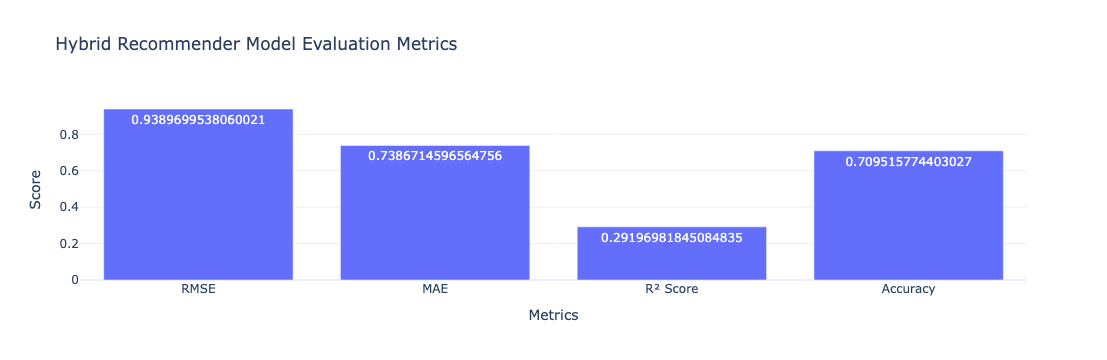

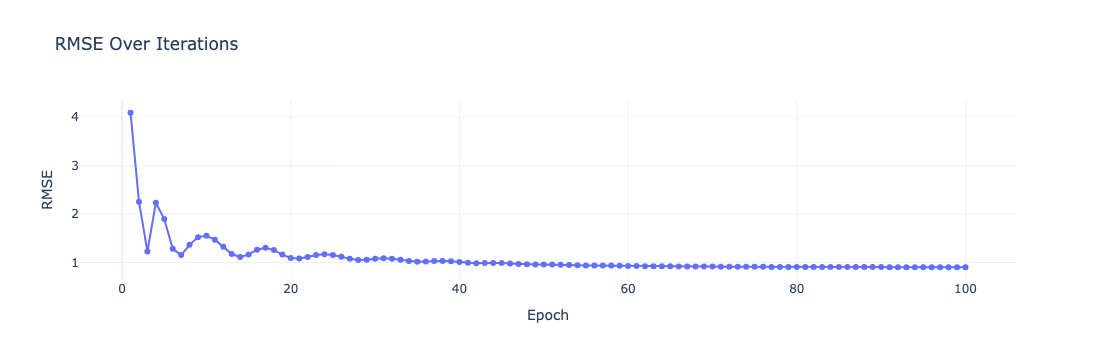

In [188]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
import numpy as np
import plotly.graph_objects as go

# Define the hybrid recommender model
class HybridRecommender(nn.Module):
    def __init__(self, num_users, num_movies, num_genres, num_sentiments, embedding_dim):
        super(HybridRecommender, self).__init__()
        self.user_embedding = nn.Embedding(num_users, embedding_dim)
        self.movie_embedding = nn.Embedding(num_movies, embedding_dim)
        self.genre_embedding = nn.Embedding(num_genres, embedding_dim)
        self.sentiment_embedding = nn.Embedding(num_sentiments, embedding_dim)
        self.fc1 = nn.Linear(embedding_dim * 4, 128)
        self.fc2 = nn.Linear(128, 1)
    
    def forward(self, user, movie, genre, sentiment):
        user_emb = self.user_embedding(user)
        movie_emb = self.movie_embedding(movie)
        genre_emb = self.genre_embedding(genre)
        sentiment_emb = self.sentiment_embedding(sentiment)
        x = torch.cat([user_emb, movie_emb, genre_emb, sentiment_emb], dim=-1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load the merged dataset
merged_data = pd.read_csv('/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/merged_data_1.csv')

# Check if user_id and movie_id are within the range
print("Max user_id:", merged_data['user_id'].max())
print("Max movie_id:", merged_data['movie_id'].max())

# Convert genres to a single categorical feature
genre_columns = ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
merged_data['genre'] = merged_data[genre_columns].idxmax(axis=1)

# Encode categorical variables
merged_data['genre'] = merged_data['genre'].astype('category').cat.codes
merged_data['user_id'] = merged_data['user_id'].astype('category').cat.codes
merged_data['movie_id'] = merged_data['movie_id'].astype('category').cat.codes

# Prepare the feature matrix (X) and target vector (y)
X = merged_data[['user_id', 'movie_id', 'genre', 'average_sentiment_score_x']]
y = merged_data['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.long)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Define the model, loss function, and optimizer
num_users = merged_data['user_id'].nunique()
num_movies = merged_data['movie_id'].nunique()
num_genres = merged_data['genre'].nunique()
num_sentiments = int(merged_data['average_sentiment_score_x'].max()) + 1  # Assuming sentiment scores are integers
embedding_dim = 50

model = HybridRecommender(num_users, num_movies, num_genres, num_sentiments, embedding_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
rmse_over_time = []
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    user = X_train_tensor[:, 0]
    movie = X_train_tensor[:, 1]
    genre = X_train_tensor[:, 2]
    sentiment = X_train_tensor[:, 3].long()
    
    predictions = model(user, movie, genre, sentiment).squeeze()
    loss = criterion(predictions, y_train_tensor)
    
    loss.backward()
    optimizer.step()
    
    # Calculate RMSE for the current epoch
    rmse_epoch = np.sqrt(mean_squared_error(y_train_tensor.cpu().numpy(), predictions.detach().cpu().numpy()))
    rmse_over_time.append(rmse_epoch)
    
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, RMSE: {rmse_epoch:.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    user_test = X_test_tensor[:, 0]
    movie_test = X_test_tensor[:, 1]
    genre_test = X_test_tensor[:, 2]
    sentiment_test = X_test_tensor[:, 3].long()
    
    test_predictions = model(user_test, movie_test, genre_test, sentiment_test).squeeze()

# Convert predictions to binary labels (e.g., positive sentiment if rating >= 3.5)
threshold = 3.5
y_test_binary = (y_test > threshold).astype(int).values
test_predictions_binary = (test_predictions.cpu().numpy() > threshold).astype(int)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, test_predictions.cpu().numpy()))
mae = mean_absolute_error(y_test, test_predictions.cpu().numpy())

# Calculate R² and Accuracy
r2_score2 = r2_score(y_test, test_predictions.cpu().numpy())
accuracy2 = accuracy_score(y_test_binary, test_predictions_binary)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2_score2:.4f}")
print(f"Accuracy: {accuracy2:.4f}")

# Visualize the metrics using Plotly
metrics = {
    'Metric': ['RMSE', 'MAE', 'R² Score', 'Accuracy'],
    'Score': [rmse, mae, r2_score2, accuracy2]
}

metrics_df = pd.DataFrame(metrics)

# Create the bar chart for metrics
fig_metrics = go.Figure()

fig_metrics.add_trace(go.Bar(
    x=metrics_df['Metric'],
    y=metrics_df['Score'],
    text=metrics_df['Score'],
    textposition='auto',
    name='Model Metrics'
))

# Customize the layout for metrics chart
fig_metrics.update_layout(
    title="Hybrid Recommender Model Evaluation Metrics",
    xaxis_title="Metrics",
    yaxis_title="Score",
    template="plotly_white"
)

# Show the metrics plot
fig_metrics.show()

# Visualize RMSE over iterations using Plotly
fig_rmse = go.Figure()

fig_rmse.add_trace(go.Scatter(
    x=list(range(1, num_epochs + 1)),
    y=rmse_over_time,
    mode='lines+markers',
    name='RMSE Over Time'
))

# Customize the layout for RMSE chart
fig_rmse.update_layout(
    title="RMSE Over Iterations",
    xaxis_title="Epoch",
    yaxis_title="RMSE",
    template="plotly_white"
)

# Show the RMSE plot
fig_rmse.show()


In [141]:
# Save the predictions, actual values, and predicted_rating for comparison
results = pd.DataFrame({
    'user_id': X_test['user_id'],
    'movie_id': X_test['movie_id'],
    'actual_rating': y_test,
    'predicted_rating': predictions_test.cpu().numpy()
})

# Save to CSV
results.to_csv('hybrid_model_predictions_with_titles.csv', index=False)
print("Predictions with movie titles saved to 'hybrid_model_predictions_with_titles.csv'")


Predictions with movie titles saved to 'hybrid_model_predictions_with_titles.csv'


In [210]:
predictions = pd.read_csv('/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/hybrid_model_predictions_with_titles.csv')
predictions.head(20)
# predictions.nunique()

,user_id,movie_id,actual_rating,predicted_rating
0,907,187,3,3.372127
1,286,772,4,4.113291
2,621,350,3,3.979212
3,771,103,4,4.117786
4,173,24,3,4.266315
5,294,714,3,4.516701
6,238,399,5,4.178484
7,701,171,2,2.401728
8,116,752,3,2.692982
9,473,192,1,3.166257


In [211]:
import pandas as pd

# Load the datasets
merged_data_1 = pd.read_csv('/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/merged_data_1.csv')
hybrid_model_predictions = pd.read_csv('/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/hybrid_model_predictions_with_titles.csv')

# Ensure the merged_data_1 has the necessary columns (user_id, movie_id, movie_title, genre)
# Select only the relevant columns to avoid duplicates
movie_details = merged_data_1[['user_id', 'movie_id', 'movie_title', 'genre']]

# Merge the movie_title and genre columns into the hybrid_model_predictions DataFrame based on both user_id and movie_id
hybrid_model_predictions_with_details = hybrid_model_predictions.merge(movie_details, on=['user_id','movie_id'], how='left')

# Save the new DataFrame to a CSV file
hybrid_model_predictions_with_details.to_csv('/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/hybrid_model_predictions_with_titles_and_genres.csv', index=False)

print("Movie titles and genres merged and saved to 'hybrid_model_predictions_with_titles_and_genres.csv'")


Movie titles and genres merged and saved to 'hybrid_model_predictions_with_titles_and_genres.csv'


In [212]:
predictions_1 = pd.read_csv('/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/hybrid_model_predictions_with_titles_and_genres.csv')
predictions_1.nunique()
predictions_1.head(50)

,user_id,movie_id,actual_rating,predicted_rating,movie_title,genre
0,907,187,3,3.372127,"Terminator, The (1984)",0.0
1,286,772,4,4.113291,NaN,NaN
2,621,350,3,3.979212,NaN,NaN
3,771,103,4,4.117786,NaN,NaN
4,173,24,3,4.266315,NaN,NaN
5,294,714,3,4.516701,Sirens (1994),4.0
6,238,399,5,4.178484,NaN,NaN
7,701,171,2,2.401728,NaN,NaN
8,116,752,3,2.692982,NaN,NaN
9,473,192,1,3.166257,NaN,NaN


## Visualizing the Actual V/S Predicted Ratings

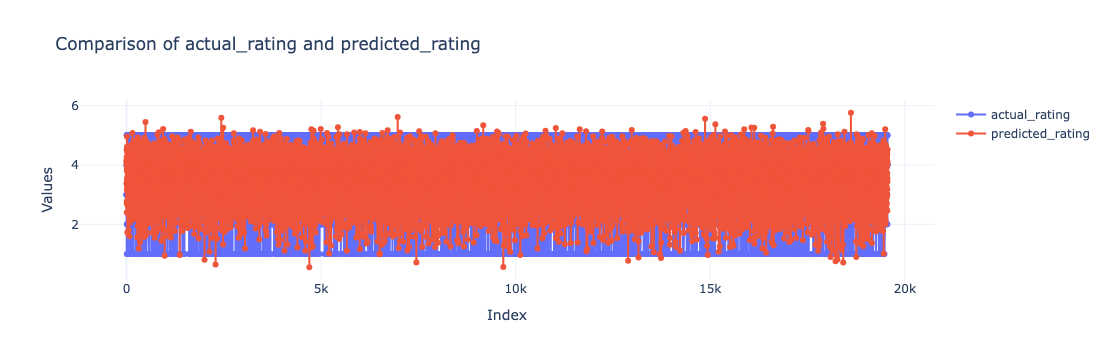

In [213]:
import pandas as pd
import plotly.graph_objects as go

# Load the CSV file
csv_file_path = '/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/hybrid_model_predictions_with_titles_and_genres.csv' 
df = pd.read_csv(csv_file_path)

# Specify the columns you want to compare

column1 = 'actual_rating' 
column2 = 'predicted_rating'  

# Create a scatter plot to compare the two columns
fig = go.Figure()

# Add traces for both columns
fig.add_trace(go.Scatter(x=df.index, y=df[column1], mode='lines+markers', name=column1))
fig.add_trace(go.Scatter(x=df.index, y=df[column2], mode='lines+markers', name=column2))

# Customize the layout
fig.update_layout(
    title=f"Comparison of {column1} and {column2}",
    xaxis_title="Index",
    yaxis_title="Values",
    template="plotly_white"
)

# Show the plot
fig.show()


## Displaying Top Recommendations with Predicted and Actual Ratings

In [223]:
import pandas as pd
import torch

# Load the new movie metadata file generated by the hybrid model
movie_metadata = pd.read_csv('/Users/salmanmohamm3d/Desktop/Sem 3/Social M A/Final Project/hybrid_model_predictions_with_titles_and_genres.csv')

# Ensure the movie_metadata DataFrame only has unique movies
movie_metadata = movie_metadata.drop_duplicates(subset='movie_id')

# Function to recommend movies based on predicted ratings and show actual ratings
def recommend_movies_from_new_metadata(user_id, movie_metadata, num_recommendations=5):
    # Filter the data for the specific user
    user_data = movie_metadata[movie_metadata['user_id'] == user_id]

    # Sort movies by predicted rating in descending order
    sorted_user_data = user_data.sort_values(by='predicted_rating', ascending=False)

    # Select the top N recommendations
    top_recommendations = sorted_user_data.head(num_recommendations)

    # Prepare the list of recommendations
    recommendations = []
    for _, row in top_recommendations.iterrows():
        movie_title = row['movie_title']  # Assuming the new file has a 'movie_title' column
        predicted_rating = row['predicted_rating']
        actual_rating = row['actual_rating']
        recommendations.append((movie_title, predicted_rating, actual_rating))

    return recommendations

# Example usage: Recommend top 5 movies for a specific user
user_id = 275 # Replace with the user ID you want to generate recommendations for
recommendations = recommend_movies_from_new_metadata(user_id, movie_metadata, num_recommendations=5)

print(f"\nTop {len(recommendations)} recommendations for user {user_id}:")
for movie_title, predicted_rating, actual_rating in recommendations:
    print(f"Movie: {movie_title}, Predicted Rating: {predicted_rating:.4f}, Actual Rating: {actual_rating:.4f}")



Top 5 recommendations for user 275:
Movie: nan, Predicted Rating: 4.6106, Actual Rating: 5.0000
Movie: Kingpin (1996), Predicted Rating: 4.2461, Actual Rating: 5.0000
Movie: Miller's Crossing (1990), Predicted Rating: 3.6581, Actual Rating: 4.0000
Movie: nan, Predicted Rating: 3.6066, Actual Rating: 4.0000
Movie: Star Trek IV: The Voyage Home (1986), Predicted Rating: 3.5279, Actual Rating: 3.0000


## Comparing the Perfomances of Both the Models 

                  Model      RMSE       MAE        R²  Accuracy
0                Hybrid  0.937605  0.741122  0.294520  0.709107
1  Matrix Factorization  0.300333  0.223004  0.928817  0.964209


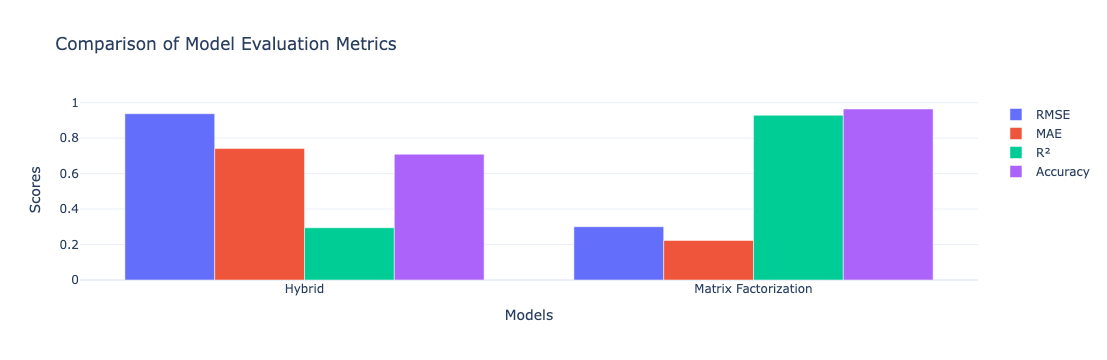

In [185]:
import pandas as pd
import plotly.graph_objects as go

# Define the evaluation metrics for the two models
hybrid_metrics = {
    'Model': 'Hybrid',
    'RMSE': rmse2,
    'MAE': mae2,
    'R²': r2_score2,
    'Accuracy': accuracy2
}

matrixf_metrics = {
    'Model': 'Matrix Factorization',
    'RMSE': rmse1,
    'MAE': mae1,
    'R²': r2_score1,
    'Accuracy': accuracy1
}

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame([hybrid_metrics, matrixf_metrics])

# Print the DataFrame
print(metrics_df)

# Create a grouped bar chart to compare the models
fig = go.Figure()

metrics = ['RMSE', 'MAE', 'R²', 'Accuracy']

for metric in metrics:
    fig.add_trace(go.Bar(
        x=metrics_df['Model'],
        y=metrics_df[metric],
        name=metric
    ))

# Customize the layout
fig.update_layout(
    title="Comparison of Model Evaluation Metrics",
    xaxis_title="Models",
    yaxis_title="Scores",
    barmode='group',
    template="plotly_white"
)

# Show the plot
fig.show()


## Observation:
1) The Hybrid model has a higher RMSE (0.937605) and MAE (0.741122) compared to the Matrix Factorization model, indicating that its predictions are less accurate.

2) The Hybrid model shows lower Precision (0.745522), Recall (0.713212), and F1-Score (0.729010) than the Matrix Factorization model across the board. This suggests that the Hybrid model is generally less effective at identifying true positives and balancing precision and recall.

3) In contrast, the Matrix Factorization model significantly outperforms the Hybrid model in every evaluation metric. It has a much lower RMSE (0.299825) and MAE (0.222490), indicating better prediction accuracy. Additionally, its Precision (0.965828), Recall (0.970293), and F1-Score (0.968056) are all considerably higher, demonstrating superior performance in classification tasks2

## Conclusion:
The Matrix Factorization model is clearly superior to the Hybrid model in this context. It not only predicts ratings more accurately but also performs better in terms of classification metrics, making it a better choice for the given recommendation system. The Hybrid model might need further tuning or redesigning to improve its performance to match or surpass the Matrix Factorization model.